In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

from feature import feature_extraction_freq
from feature import feature_normalization

In [2]:
df = pd.read_csv('./data/processed_data/all/resample_to_50_per_act/resample_to_50.csv')
df.head()

,x,y,z,class,seg,suspicious
0,20.000000,781.000000,-507.000000,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
1,47.149682,801.381706,-493.331434,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
2,68.463292,807.909511,-517.057892,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
3,107.586607,806.152008,-560.345064,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
4,133.492367,836.226825,-555.404935,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False


In [3]:
segs = df.seg.unique()
segs

array([ 'walk/863137003295439_walk_L_2017-07-25 17-39-00_2017-07-25 17-49-00.csv-31-98',
       'walk/863137003295439_walk_L_2017-07-25 17-39-00_2017-07-25 17-49-00.csv-112-154',
       'walk/863137003295439_walk_L_2017-07-25 17-39-00_2017-07-25 17-49-00.csv-366-407',
       ..., 'clean/庆喜/repeat_82-duration_60.csv-1442-1488',
       'clean/庆喜/repeat_82-duration_60.csv-1498-1546',
       'clean/庆喜/repeat_82-duration_60.csv-1584-1628'], dtype=object)

In [4]:
seg = segs[200]
seg

'bweep/大扫帚推地/大扫帚推右手低位第二组/男/863137003291982_2017-06-30 15-05-00_2017-06-30 15-08-20.csv-866-915'

In [5]:
seg_df = df[df['seg'] ==seg]
seg_df.tail()

,x,y,z,class,seg,suspicious
10045,-830.284156,-103.486946,-482.000404,bweep,bweep/大扫帚推地/大扫帚推右手低位第二组/男/863137003291982_2017...,False
10046,-811.128324,-72.593472,-531.260675,bweep,bweep/大扫帚推地/大扫帚推右手低位第二组/男/863137003291982_2017...,False
10047,-785.343991,-28.454205,-593.874148,bweep,bweep/大扫帚推地/大扫帚推右手低位第二组/男/863137003291982_2017...,False
10048,-709.775260,55.378742,-611.738748,bweep,bweep/大扫帚推地/大扫帚推右手低位第二组/男/863137003291982_2017...,False
10049,-698.330496,71.888822,-591.512995,bweep,bweep/大扫帚推地/大扫帚推右手低位第二组/男/863137003291982_2017...,False


numpy.ndarray

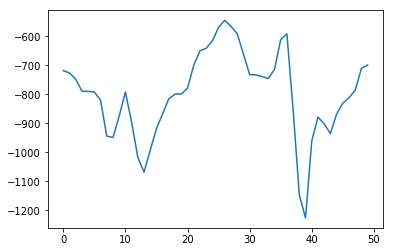

In [6]:
x = seg_df['x'].values
y = seg_df['y'].values
z = seg_df['z'].values
type(x)
plt.plot(x)

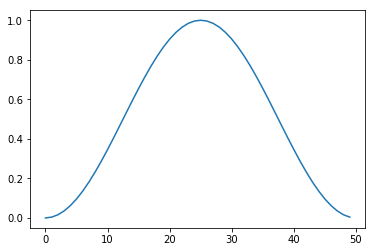

In [7]:
fft_size = len(x)
plt.plot(signal.hann(fft_size, sym=0))

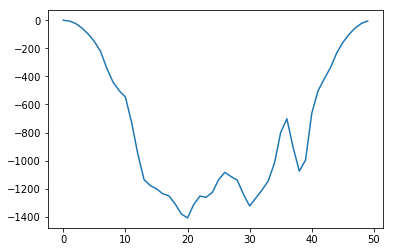

In [8]:
tmp = x * signal.hann(fft_size, sym=0) * 2
plt.plot(tmp)

Wall time: 101 ms


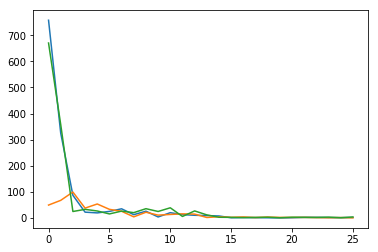

In [9]:
%%time
fft_size = len(x)

xf = np.fft.rfft(x * signal.hann(fft_size, sym=0) * 2)/fft_size
yf = np.fft.rfft(y * signal.hann(fft_size, sym=0) * 2)/fft_size
zf = np.fft.rfft(z * signal.hann(fft_size, sym=0) * 2)/fft_size
xfp = np.abs(xf)
yfp = np.abs(yf)
zfp = np.abs(zf)
len(xfp)
xfp
yfp
zfp
plt.plot(xfp)
plt.plot(yfp)
plt.plot(zfp)

In [10]:
features = feature_extraction_freq(xfp,yfp,zfp)
features

array([  7.57523035e+02,   4.95653060e+01,   6.70304783e+02,
         2.53841544e+01,   1.72137250e+01,   2.71854537e+01,
         4.06756795e+03,   5.80698098e+02,   4.71631525e+03,
         6.37774878e+01,   2.40976783e+01,   6.86754341e+01,
         4.16248236e+00,   2.00394222e+00,   4.44593062e+00,
         1.65682755e+01,   3.51604140e+00,   1.85395635e+01,
         2.70482285e+00,   4.25277029e+00,   3.44136985e+00,
         1.92737618e+01,   2.23210666e+01,   2.45686802e+01,
         4.39018927e+00,   4.72451760e+00,   4.95668036e+00,
         1.81331920e+02,   1.74835373e+02,   2.02775108e+02,
         2.99895149e+03,   2.82197045e+03,   3.50339326e+03])